In [68]:
##Question1

#imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import sys 
from MakeDataset import X_train, X_test, y_train, y_test



***Raw Accelerometer data***

In [12]:
print(X_train.shape)
print(y_train.shape)

(126, 500, 3)
(126,)


***Dataset with features***

In [13]:
train_path = r"C:\Users\srima\ML_assignement\ML_assignment1\data_pp\UCI HAR Dataset\train"
test_path = r"C:\Users\srima\ML_assignement\ML_assignment1\data_pp\UCI HAR Dataset\test"
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

subject_train = pd.read_csv(os.path.join(train_path, "subject_train.txt"), sep = '\s+', header=None)
y= pd.read_csv(os.path.join(train_path, "y_train.txt"), sep = '\s+', header=None)

X_train_feat = pd.read_csv(os.path.join(train_path, "X_train.txt"), sep = '\s+', header=None)
X_train_features = []
y_train_features = []
num_samples_per_activity = 40
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined_feat","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined_feat","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index
        combined_data = X_train_feat.iloc[label_idxs, :]
        if combined_data.shape[0] > num_samples_per_activity:
            combined_data = combined_data[:num_samples_per_activity]
        elif combined_data.shape[0] < num_samples_per_activity:
            # Pad with zeros if fewer samples
            padding = np.zeros((num_samples_per_activity - combined_data.shape[0], combined_data.shape[1]))
            combined_data = np.vstack((combined_data, padding))
        combined_df = pd.DataFrame(combined_data)
        save_path = os.path.join("Combined_feat","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        combined_df.to_csv(save_path,index=False)
        X_train_features.append(combined_data)
        y_train_features.extend([label])

print("Done Combining the training data")
X_train_features = np.array(X_train_features)
y_train_features = np.array(y_train_features)
print(X_train_features.shape)
print(y_train_features.shape)



Done Combining the training data
(126, 40, 561)
(126,)


In [14]:
X_train_features.shape

(126, 40, 561)

In [15]:
X_test_features = []
y_test_features = []
num_samples_per_activity = 40
subject_test = pd.read_csv(os.path.join(test_path, "subject_test.txt"), sep = '\s+', header=None)
y= pd.read_csv(os.path.join(test_path, "y_test.txt"), sep = '\s+', header=None)
X_test_feat = pd.read_csv(os.path.join(test_path, "X_test.txt"), sep = '\s+', header=None)

for subject in np.unique(subject_test.values):

    sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined_feat","Test",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined_feat","Test",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index
        combined_data = X_test_feat.iloc[label_idxs, :]
        if combined_data.shape[0] > num_samples_per_activity:
            combined_data = combined_data[:num_samples_per_activity]
        elif combined_data.shape[0] < num_samples_per_activity:
            # Pad with zeros if fewer samples
            padding = np.zeros((num_samples_per_activity - combined_data.shape[0], combined_data.shape[1]))
            combined_data = np.vstack((combined_data, padding))
        combined_df = pd.DataFrame(combined_data)
        save_path = os.path.join("Combined_feat","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
        combined_df.to_csv(save_path,index=False)
        X_test_features.append(combined_data)
        y_test_features.extend([label])

print("Done Combining the test data")
X_test_features = np.array(X_test_features)
y_test_features = np.array(y_test_features)
print(X_test_features.shape)
print(y_test_features.shape)

Done Combining the test data
(54, 40, 561)
(54,)


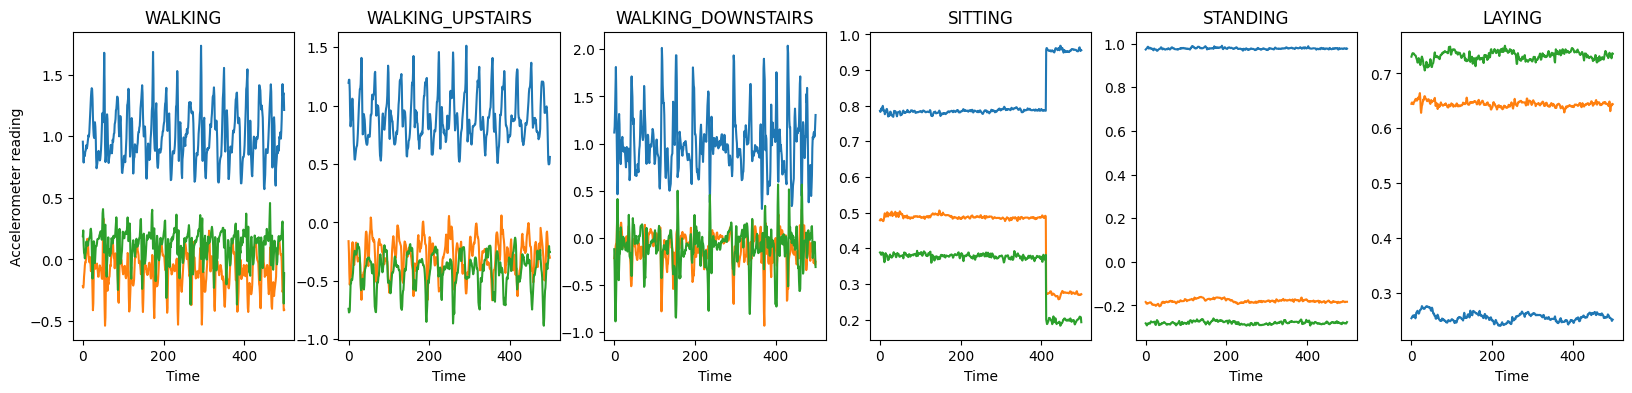

In [16]:
import matplotlib.pyplot as plt 

labels = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
plt.figure(figsize=(20,4))
one = False

for i in range(6) :
    label_ind = np.where(y_train == (i+1))[0][0] ## extracting the first index of that label

    sample_data = X_train[label_ind]
    plt.subplot(1,6,i+1)
    plt.plot(sample_data)
    plt.title(labels[i])
    plt.xlabel('Time')
    if not one :
        plt.ylabel('Accelerometer reading')
        one = True 

plt.show()


We can observe that the data is similar when compared to static activities and the other group of non static activities is also similar
The model should be able to easily classify the non static and static data, and it can even classify the other activities, as they are not completely similar

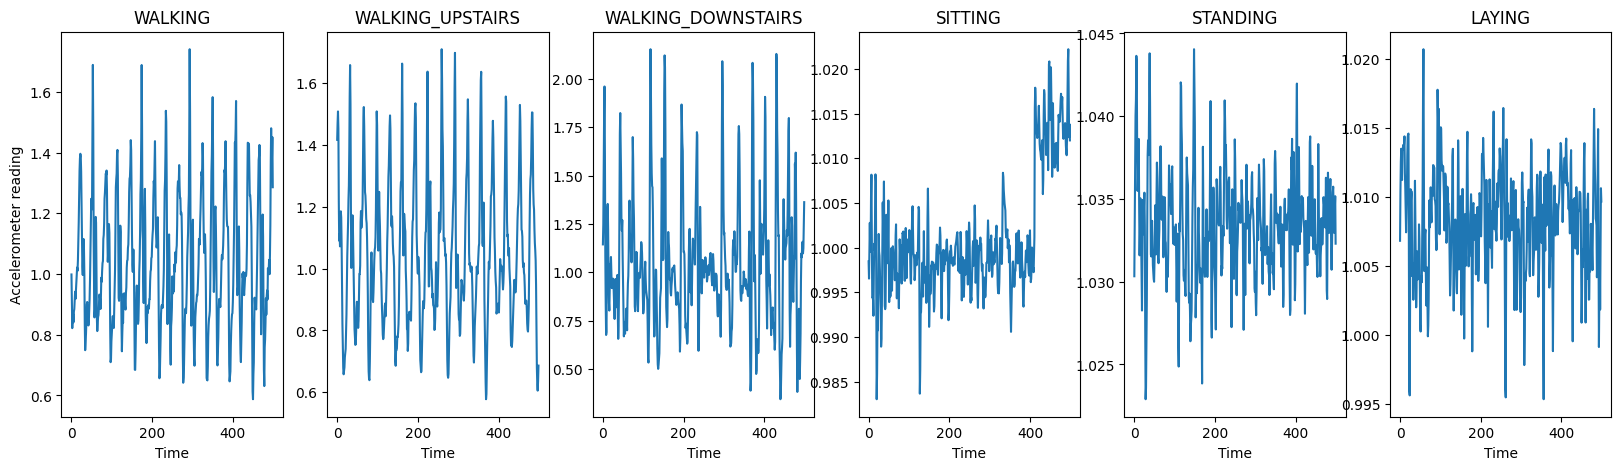

In [17]:
import matplotlib.pyplot as plt 

labels = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
plt.figure(figsize=(20,5))
one = False
for i in range(6) :
    label_ind = np.where(y_train == (i+1))[0][0] ## extracting the first index of that label
    sample_data = X_train[label_ind]
    acc_magnitude = np.sqrt(sample_data[:, 0]**2 + sample_data[:, 1]**2 + sample_data[:, 2]**2)
    plt.subplot(1,6,i+1)
    plt.plot(acc_magnitude)
    plt.title(labels[i])
    plt.xlabel('Time')
    if not one :
        plt.ylabel('Accelerometer reading')
        one = True 
plt.show()

***2nd Answer***

**Observation:** From the graph obtained above, it is clear that static activities (sitting, standing and laying) have their linear acceleration squared values centered around `1.0` and dynamic activities (walking, walking upstairs and walking downstairs), ranging approximately from `0` to `3`. Dynamic activities show multiple spikes for all the samples. 

Therefore, a machine learning model is **not required** to differentiate between static and dynamic activities. 

*Just a few conditional statements would do the job!*

***3rd Question***

PCA on total acceleration 

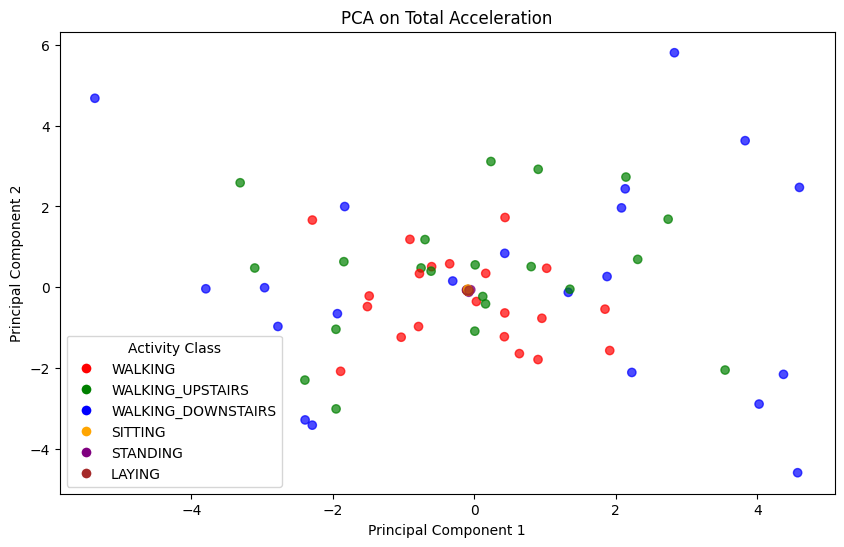

In [18]:
from sklearn.decomposition import PCA
total_acceleration = np.sqrt(X_train[:, :, 0]**2 + X_train[:, :, 1]**2 + X_train[:, :, 2]**2)
#here flattening is essence is not neccesary, as array is already 2-D
total_acceleration_flattened = total_acceleration.reshape(total_acceleration.shape[0], -1)
pca = PCA(n_components=2)
X_pca_total_acc = pca.fit_transform(total_acceleration_flattened)


labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
label_to_color = {i+1: colors[i] for i in range(len(labels))}
point_colors = [label_to_color[label] for label in y_train]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_total_acc[:, 0], X_pca_total_acc[:, 1], c=point_colors, alpha=0.7)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in colors]
plt.legend(handles, labels, title="Activity Class")

# Add titles and labels
plt.title("PCA on Total Acceleration")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show plot
plt.show()

***using TSFEL***

In [19]:
X_train.shape

(126, 500, 3)

In [20]:
import tsfel
from sklearn import preprocessing
cfg = tsfel.get_features_by_domain() # retrieves all features
X_tsfel_features = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_tsfel_features_test = tsfel.time_series_features_extractor(cfg, X_test, fs=50)
## Now remove the redundancy and noise

## highly correlated features are removed
corr_features = tsfel.correlated_features(X_tsfel_features)
X_tsfel_features.drop(corr_features, axis=1, inplace=True)
X_tsfel_features_test.drop(corr_features, axis=1, inplace=True)
##Normalising the features
scaler = preprocessing.StandardScaler()
X_train_features_tsfel = scaler.fit_transform(X_tsfel_features)
X_test_features_tsfel = scaler.fit_transform(X_tsfel_features_test)


X_train_features_tsfel


*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


array([[ 0.04623187, -0.27741178,  0.15449247, ..., -0.68747038,
         0.82640816, -0.72561996],
       [-2.01290748,  0.78794608,  0.00720752, ..., -1.61300795,
        -0.53959848, -0.72561996],
       [ 0.30929467, -0.27741178,  0.10834883, ..., -0.37498259,
        -0.7114503 , -0.72561996],
       ...,
       [-2.09124937,  1.65037863,  0.17932956, ..., -1.51553199,
        -0.49297593, -0.72561996],
       [ 0.05700152, -0.27741178, -0.1159268 , ..., -0.63800202,
         0.59030608, -0.45259834],
       [ 0.25404954, -0.27741178, -0.12733801, ..., -1.03832584,
         1.18292139, -0.72561996]])

In [21]:
X_tsfel_features

0_Absolute energy  0_Autocorrelation  0_Centroid  \
0           428.119592                5.0    5.005085   
1            32.768542               26.0    4.955882   
2           478.627177                5.0    4.989670   
3           477.002571                5.0    5.010214   
4           530.466450                6.0    4.997978   
..                 ...                ...         ...   
121         497.739114                3.0    4.944363   
122         340.897228               84.0    4.595538   
123          17.727040               43.0    5.013382   
124         430.187347                5.0    4.914747   
125         468.020212                5.0    4.910935   

     0_ECDF Percentile Count_0  0_ECDF Percentile Count_1  \
0                        100.0                      400.0   
1                        100.0                      400.0   
2                        100.0                      400.0   
3                        100.0                      400.0   
4                        100.0                      400.0   
..                         ...                        ...   
121                      100.0                      400.0   
122                      100.0                      400.0   
123                      100.0                      400.0   
124                      100.0                      400.0   
125                      100.0                      400.0   

     0_ECDF Percentile_0  0_ECDF_0  0_ECDF_1  0_ECDF_2  0_ECDF_3  ...  \
0               0.737727     0.002     0.004     0.006     0.008  ...   
1               0.249165     0.002     0.004     0.006     0.008  ...   
2               0.975656     0.002     0.004     0.006     0.008  ...   
3               0.762545     0.002     0.004     0.006     0.008  ...   
4               0.770530     0.002     0.004     0.006     0.008  ...   
..                   ...       ...       ...       ...       ...  ...   
121             0.784800     0.002     0.004     0.006     0.008  ...   
122             0.776342     0.002     0.004     0.006     0.008  ...   
123             0.183463     0.002     0.004     0.006     0.008  ...   
124             0.732451     0.002     0.004     0.006     0.008  ...   
125             0.646158     0.002     0.004     0.006     0.008  ...   

      2_Slope  2_Spectral decrease  2_Spectral distance  2_Spectral entropy  \
0    0.000012            -3.141308        -53566.537410            0.545897   
1    0.000011          -103.443041        -47404.363867            0.533011   
2   -0.000003           -41.047072        -18920.905188            0.618367   
3   -0.000022            -2.066870        -41420.678914            0.553959   
4    0.000035            -1.189720        -34492.768860            0.565155   
..        ...                  ...                  ...                 ...   
121  0.000024            -2.377024        -36173.543645            0.390947   
122  0.000201           -10.920754        -38028.323101            0.474169   
123 -0.000061          -101.080765        -54068.913067            0.226889   
124 -0.000441            -1.760854        -56766.771830            0.616956   
125 -0.000028            -3.018399        -55861.233508            0.468138   

     2_Spectral positive turning points  2_Spectral roll-on  \
0                                  73.0                 0.0   
1                                  75.0                 0.0   
2                                  79.0                 0.0   
3                                  74.0                 0.0   
4                                  73.0                 0.0   
..                                  ...                 ...   
121                                72.0                 0.0   
122                                67.0                 0.0   
123                                83.0                 0.0   
124                                71.0                 0.0   
125                                79.0                 0.0   

    

In [22]:
X_train_features_tsfel.shape

(126, 844)

In [23]:
X_test_features_tsfel.shape

(54, 844)

***PCA on TSEFL data***

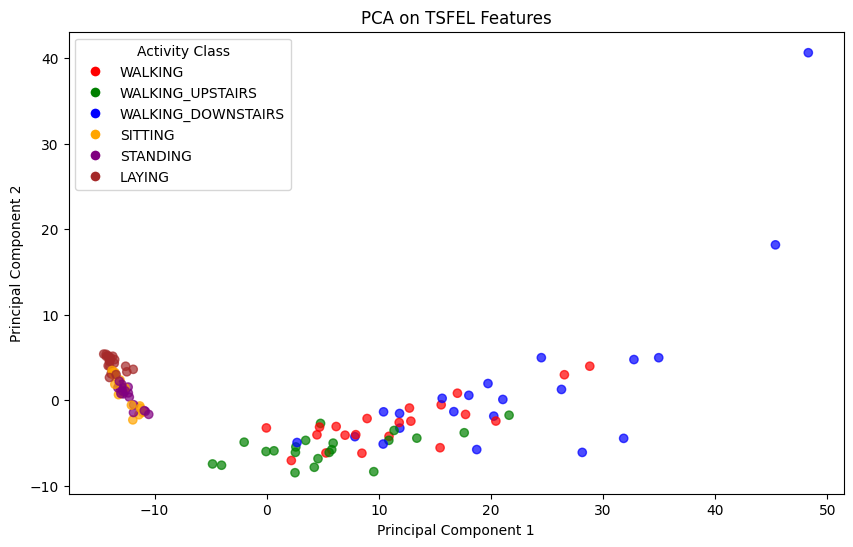

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_train_reduced_tsefl = pca.fit_transform(X_train_features_tsfel)

labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
label_to_color = {i+1: colors[i] for i in range(len(labels))}
point_colors = [label_to_color[label] for label in y_train]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_reduced_tsefl[:, 0], X_train_reduced_tsefl[:, 1], c=point_colors, alpha=0.7)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in colors]
plt.legend(handles, labels, title="Activity Class")

# Add titles and labels
plt.title("PCA on TSFEL Features")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show plot
plt.show()

***PCA on the dataset with features (561 featurised vectors)***

In [25]:
X_train_feat.shape

(7352, 561)

In [26]:
y= pd.read_csv(os.path.join(train_path, "y_train.txt"), sep = '\s+', header=None)
y = y.values.reshape(-1)
y.shape

(7352,)

(7352, 2)


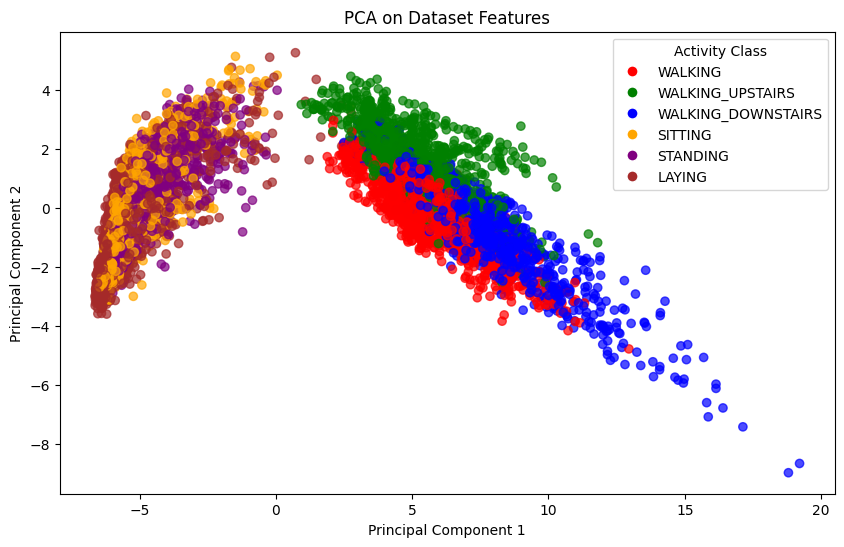

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
# X_train_features_flattened= X_train_feat.reshape(X_train_feat.shape[0], -1)
# print(X_train_features_flattened.shape)
X_train_reduced = pca.fit_transform(X_train_feat)
print(X_train_reduced.shape)
labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
label_to_color = {i+1: colors[i] for i in range(len(labels))}
point_colors = [label_to_color[label] for label in y]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=point_colors, alpha=0.7)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in colors]
plt.legend(handles, labels, title="Activity Class")

# Add titles and labels
plt.title("PCA on Dataset Features")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show plot
plt.show()

(126, 22440)
(126, 2)


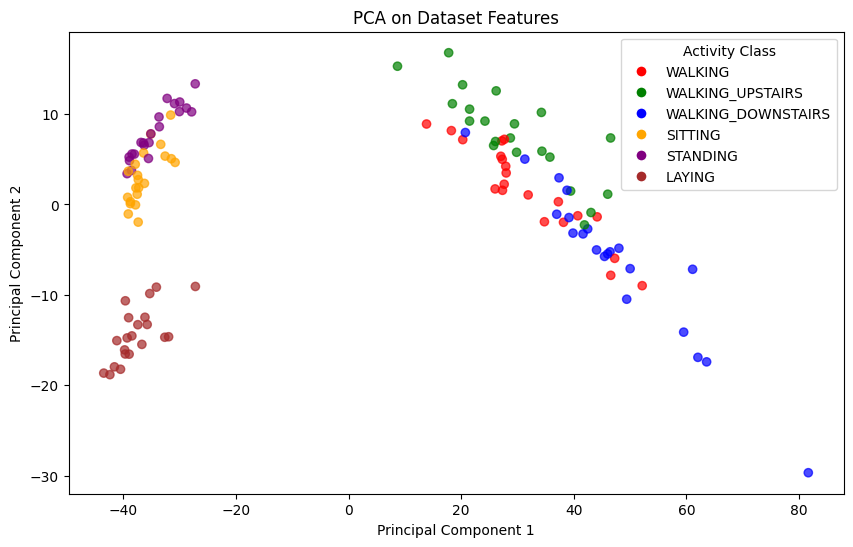

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_train_features_flattened= X_train_features.reshape(X_train_features.shape[0], -1)
print(X_train_features_flattened.shape)
X_train_reduced = pca.fit_transform(X_train_features_flattened)
print(X_train_reduced.shape)
labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
label_to_color = {i+1: colors[i] for i in range(len(labels))}
point_colors = [label_to_color[label] for label in y_train_features]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=point_colors, alpha=0.7)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in colors]
plt.legend(handles, labels, title="Activity Class")

# Add titles and labels
plt.title("PCA on Dataset Features")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show plot
plt.show()

On comparing the results of PCA on these different datasets, I felt PCA on both the featurised datasets was better for visualizing than the raw accelerometer data, as PCA could exact meaningful information from the features while dimensionality reduction

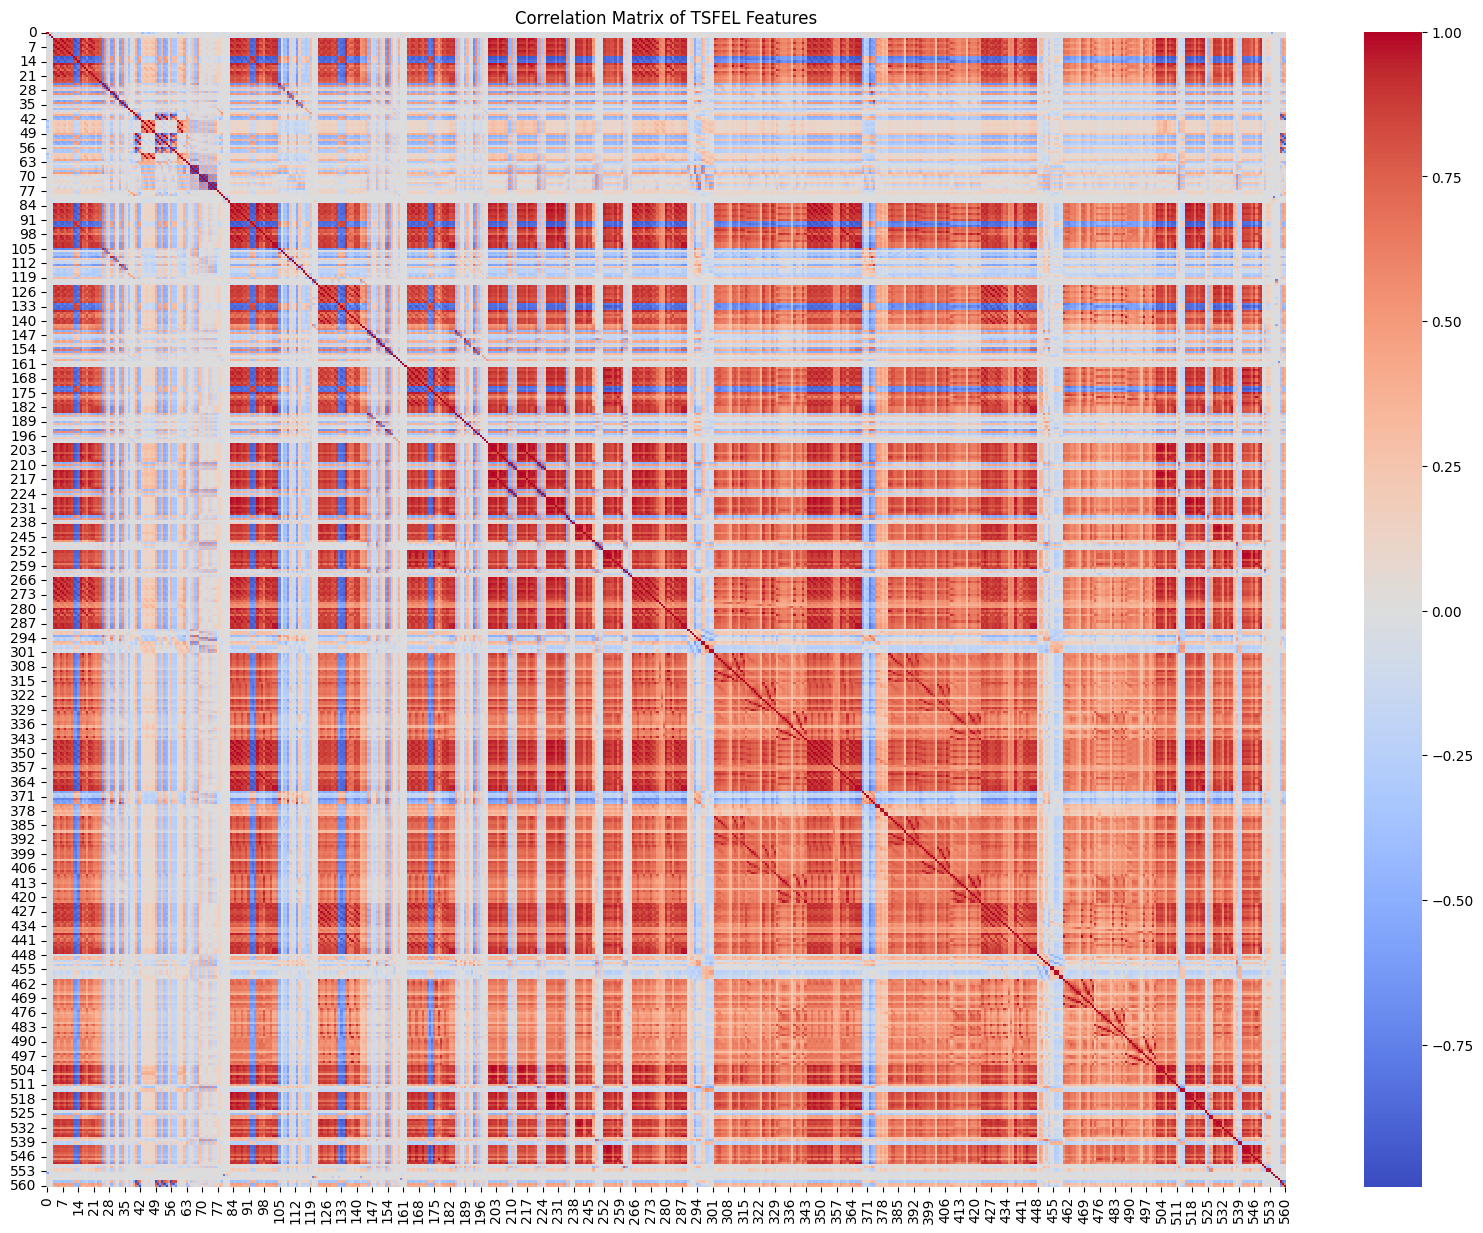

In [29]:
import seaborn as sns
corr_matrix = pd.DataFrame(X_train_feat).corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix of TSFEL Features")
plt.show()

In [30]:
correlation_threshold = 0.9
high_corr_pairs = np.where(np.abs(corr_matrix) > correlation_threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) 
                   for x, y in zip(*high_corr_pairs) if x != y and x < y]
print("\nHighly correlated feature pairs (above threshold of 0.9):")
print(len(high_corr_pairs))


Highly correlated feature pairs (above threshold of 0.9):
8206


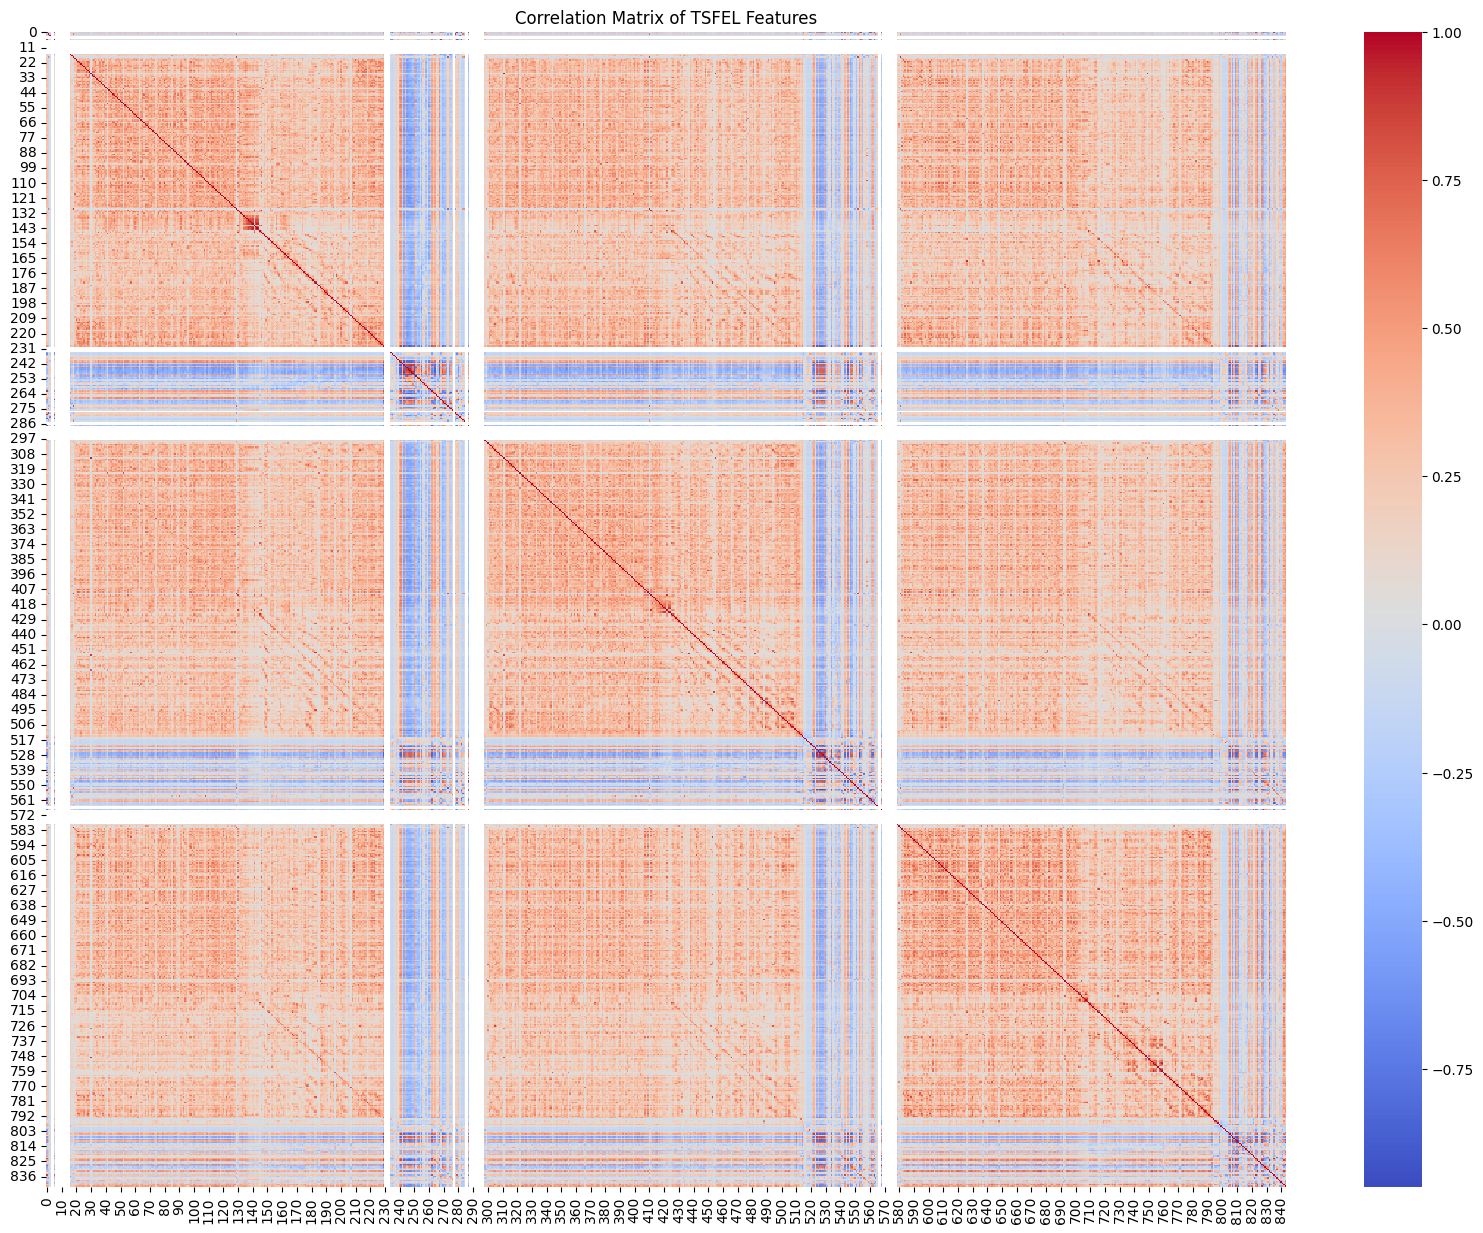

In [31]:
### I have already removed the highly correlated features as they were reduntant 
import seaborn as sns
corr_matrix = pd.DataFrame(X_train_features_tsfel).corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix of TSFEL Features")
plt.show()

In [32]:
correlation_threshold = 0.9
high_corr_pairs = np.where(np.abs(corr_matrix) > correlation_threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) 
                   for x, y in zip(*high_corr_pairs) if x != y and x < y]
print("\nHighly correlated feature pairs (above threshold of 0.9):")
print(len(high_corr_pairs))
# for pair in high_corr_pairs:
#     print(f"Feature {pair[0]} and Feature {pair[1]} are highly correlated.")


Highly correlated feature pairs (above threshold of 0.9):
52


***Task2***

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

## defining a common evaluate function 
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    
    # return accuracy, precision, recall, cm

# Training with the raw accelerometer data 
treeclf1=DecisionTreeClassifier(random_state=42)
print("Decision Tree with Raw Accelerometer Data:")
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # (126, 1500)
X_test_flattened = X_test.reshape(X_test.shape[0], -1) 
evaluate_model(treeclf1, X_train_flattened, X_test_flattened, y_train, y_test)


Decision Tree with Raw Accelerometer Data:
Accuracy: 0.6111
Precision: 0.5611
Recall: 0.6111
Confusion Matrix:
[[2 2 2 3 0 0]
 [2 5 1 0 1 0]
 [4 2 1 1 0 1]
 [0 0 0 8 1 0]
 [0 1 0 0 8 0]
 [0 0 0 0 0 9]]


In [34]:
##Now training with the TSFEL features
treeclf=DecisionTreeClassifier(random_state=44)
print("Decision Tree with TSFEL features:")
evaluate_model(treeclf, X_train_features_tsfel, X_test_features_tsfel, y_train, y_test)

Decision Tree with TSFEL features:
Accuracy: 0.7037
Precision: 0.6353
Recall: 0.7037
Confusion Matrix:
[[8 0 1 0 0 0]
 [1 7 0 0 1 0]
 [2 2 5 0 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]


c:\Users\srima\ML_assignement\ML_assignment1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
##Now training with the Dataset features
treeclf3=DecisionTreeClassifier(random_state=43)
print("Decision Tree with TSFEL features:")
X_train_features_flattened= X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flattened = X_test_features.reshape(X_test_features.shape[0],-1)
evaluate_model(treeclf3, X_train_features_flattened, X_test_features_flattened, y_train_features, y_test_features)

Decision Tree with TSFEL features:
Accuracy: 0.8333
Precision: 0.8655
Recall: 0.8333
Confusion Matrix:
[[9 0 0 0 0 0]
 [2 7 0 0 0 0]
 [3 1 5 0 0 0]
 [0 0 0 7 2 0]
 [0 0 0 1 8 0]
 [0 0 0 0 0 9]]


Clearly seeing the results, I could say the model trained on the 561 featurised dataset, gave the best performance, having the highest accuracy

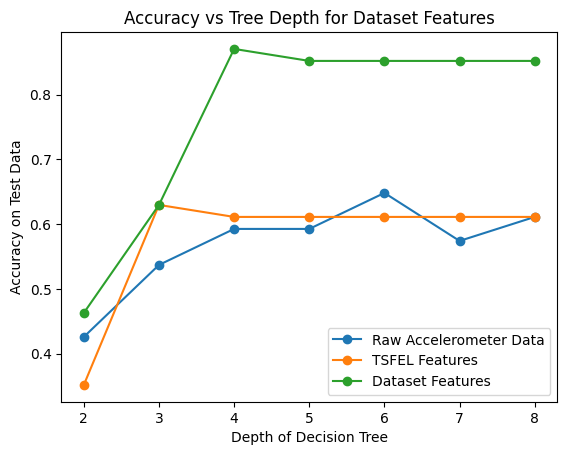

In [36]:
def train_with_varying_depths(X_train, X_test, y_train, y_test, dataset_name):
    depths = range(2, 9)  # Depths from 2 to 8
    accuracies = []

    for depth in depths:
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    # Plotting the results
    plt.plot(depths, accuracies, marker='o', label=dataset_name)
    plt.xlabel("Depth of Decision Tree")
    plt.ylabel("Accuracy on Test Data")
    plt.title(f"Accuracy vs Tree Depth for {dataset_name}")
    plt.legend()

# Case 1: Raw Accelerometer Data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Flattened (126, 1500)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
train_with_varying_depths(X_train_flattened, X_test_flattened, y_train, y_test, "Raw Accelerometer Data")

# Case 2: TSFEL Features
train_with_varying_depths(X_train_features_tsfel, X_test_features_tsfel, y_train, y_test, "TSFEL Features")

# Case 3: Dataset Features
X_train_features_flattened = X_train_features.reshape(X_train_features.shape[0], -1)  # Flattened Dataset Features
X_test_features_flattened = X_test_features.reshape(X_test_features.shape[0], -1)
train_with_varying_depths(X_train_features_flattened, X_test_features_flattened, y_train_features, y_test_features, "Dataset Features")

# Show the plot
plt.show()

On analysing the confusion matrix of the test data obtained by using featurised trainset, there is some overlap between *walking* and *walking upstairs*. Walking was incorrectly identified as walking upstairs `2 out of 6 times`. Likewise, walking upstairs was incorretly identified as walking `1 out of 6 times`.

Walking and walking upstairs are **both dynamic activies** which involve reasonable variations of all 3 axes of the accelerometer. This makes it difficult for the model to differentiate between the two activities with 100% accuracy. Moreover, it also possible that with more training data, the differences between them can be modelled better, thereby, improving the accuracy.

### Task 3

In [37]:
pip install langchain_groq

Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd 
from langchain_groq.chat_models import ChatGroq

# Groq_token = "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"
# Groq_token = "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"
Groq_token="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"


In [58]:
X_train_features_tsfel.shape

(126, 844)

In [59]:
X_train_reduced_tsefl.shape

(126, 2)

In [78]:
##zero shot 
groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}
zero_shot_prompt = """ 
You are tasked with classifying human activities based on featurized accelerometer data. The activities include:
- WALKING
- WALKING_UPSTAIRS
- WALKING_DOWNSTAIRS
- SITTING
- STANDING
- LAYING

Given the following 561-feature vector representing an activity window, predict the most likely activity label based on the provided activities list. 
Feature Vector: {feature_vector}

Do not give any extra information, give the output as the only predicted label
"""
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

model_name = "llama3-70b"
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_token, temperature=0)
predicted_activities = []
for i in range(30):  # Predict for 30 examples
    example_vector = X_train_reduced_tsefl[i+3].tolist()  # Using different test examples
    prompt = zero_shot_prompt.format(feature_vector=example_vector)
    predicted_activity = llm.invoke(prompt)
    predicted_activities.append(classes[predicted_activity.content])
    print(f"Predicted Activity for example {i+1}: {classes[predicted_activity.content]}")
print(predicted_activities)

Predicted Activity for example 1: 1
Predicted Activity for example 2: 1
Predicted Activity for example 3: 1
Predicted Activity for example 4: 1
Predicted Activity for example 5: 1
Predicted Activity for example 6: 5
Predicted Activity for example 7: 5
Predicted Activity for example 8: 1
Predicted Activity for example 9: 5
Predicted Activity for example 10: 1
Predicted Activity for example 11: 1
Predicted Activity for example 12: 1
Predicted Activity for example 13: 1
Predicted Activity for example 14: 1
Predicted Activity for example 15: 1
Predicted Activity for example 16: 1
Predicted Activity for example 17: 5
Predicted Activity for example 18: 1
Predicted Activity for example 19: 1
Predicted Activity for example 20: 5
Predicted Activity for example 21: 1
Predicted Activity for example 22: 5
Predicted Activity for example 23: 1
Predicted Activity for example 24: 1
Predicted Activity for example 25: 1
Predicted Activity for example 26: 1
Predicted Activity for example 27: 5
Predicted 

In [79]:
y_pred = np.array(predicted_activities)

accuracy = accuracy_score(y_test[3:33], y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.2000


In [80]:
few_shot_prompt = """ 
You are tasked with classifying human activities based on featurized accelerometer data. The activities include:
- WALKING
- WALKING_UPSTAIRS
- WALKING_DOWNSTAIRS
- SITTING
- STANDING
- LAYING

Here are a few labeled examples of the feature vectors and their corresponding activities:

Example 1:
Feature Vector: {example_1_vector}
Activity: {example_1_label}

Example 2:
Feature Vector: {example_2_vector}
Activity: {example_2_label}

Example 3:
Feature Vector: {example_3_vector}
Activity: {example_3_label}

Now, given the following 561-feature vector representing an activity window, predict the most likely activity label:
Feature Vector: {feature_vector}

Do not give any extra information, give the output as the only predicted label
"""

# Few-shot learning function
def few_shot_classification(feature_vector, labeled_examples):
    # Prepare the prompt using a few labeled examples
    prompt = few_shot_prompt.format(
        example_1_vector=labeled_examples[0]["feature_vector"],
        example_1_label=labeled_examples[0]["label"],
        example_2_vector=labeled_examples[1]["feature_vector"],
        example_2_label=labeled_examples[1]["label"],
        example_3_vector=labeled_examples[2]["feature_vector"],
        example_3_label=labeled_examples[2]["label"],
        feature_vector=feature_vector
    )
    
    # Invoke the Groq LLM
    predicted_label = llm.invoke(prompt)
    return predicted_label

# Example labeled data for few-shot learning
labeled_examples = [
    {"feature_vector": X_train_reduced_tsefl[0].tolist(), "label": "WALKING_UPSTAIRS"},
    {"feature_vector": X_train_reduced_tsefl[1].tolist(), "label": "LAYING"},
    {"feature_vector": X_train_reduced_tsefl[2].tolist(), "label": "STANDING"},
    {"feature_vector": X_train_reduced_tsefl[6].tolist(), "label": "WALKING"},
    {"feature_vector": X_train_reduced_tsefl[16].tolist(), "label": "WALKING_DOWNSTAIRS"},
    {"feature_vector": X_train_reduced_tsefl[9].tolist(), "label": "SITTING"},
]

# # Few-shot learning classification
# example_2 = X_train_reduced_tsefl[3].tolist()  # Use test data feature vector
# predicted_activity_few_shot = few_shot_classification(example_2, labeled_examples)
# print("Predicted Activity (Few-Shot):", predicted_activity_few_shot)
predicted_activities = []
for i in range(30):  # Predict for 30 examples
    example_vector = X_train_reduced_tsefl[i + 3].tolist()  # Using different test examples
    predicted_activity = few_shot_classification(example_vector, labeled_examples)
    predicted_activities.append(classes[predicted_activity.content])
    print(f"Predicted Activity for example {i+1}: {predicted_activity.content}")


Predicted Activity for example 1: WALKING_UPSTAIRS
Predicted Activity for example 2: WALKING_UPSTAIRS
Predicted Activity for example 3: WALKING_UPSTAIRS
Predicted Activity for example 4: WALKING_UPSTAIRS
Predicted Activity for example 5: WALKING_UPSTAIRS
Predicted Activity for example 6: STANDING
Predicted Activity for example 7: STANDING
Predicted Activity for example 8: WALKING_UPSTAIRS
Predicted Activity for example 9: LAYING
Predicted Activity for example 10: WALKING_UPSTAIRS
Predicted Activity for example 11: WALKING_UPSTAIRS
Predicted Activity for example 12: LAYING
Predicted Activity for example 13: WALKING_UPSTAIRS
Predicted Activity for example 14: WALKING_UPSTAIRS
Predicted Activity for example 15: WALKING_UPSTAIRS
Predicted Activity for example 16: WALKING_UPSTAIRS
Predicted Activity for example 17: LAYING
Predicted Activity for example 18: WALKING_UPSTAIRS
Predicted Activity for example 19: WALKING_UPSTAIRS
Predicted Activity for example 20: STANDING
Predicted Activity for 

In [82]:
y_pred = np.array(predicted_activities)

y_pred.shape
accuracy = accuracy_score(y_test[3:33], y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.1000


TASK 4

In [44]:
import os
import pandas as pd
import numpy as np
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Personal_HAR")

X_test=[]
y_test=[]
# dataset_dir = os.path.join(combined_dir,"Test")
dataset_dir = r"C:\Users\srima\ML_assignement\ML_assignment1\Personal_HAR"
for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_real_test = np.array(X_test)
y_real_test = np.array(y_test)

In [46]:

X_real_test_flattened = X_real_test.reshape(X_real_test.shape[0], -1) 

y_pred = treeclf1.predict(X_real_test_flattened)
accuracy = accuracy_score(y_real_test, y_pred)
precision = precision_score(y_real_test, y_pred, average='weighted')
recall = recall_score(y_real_test, y_pred, average='weighted')
cm = confusion_matrix(y_real_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Confusion Matrix:\n{cm}")
# X_real_test_flattened = X_real_test.reshape(X_test.shape[0], -1) 

# evaluate_model(treeclf1, X_train_flattened, X_test_flattened, y_train, y_test)

ValueError: X has 2500 features, but DecisionTreeClassifier is expecting 1500 features as input.

In [ ]:
y_train

array([2, 6, 5, 2, 2, 2, 1, 1, 5, 4, 1, 4, 1, 1, 6, 2, 3, 1, 1, 4, 3, 3,
       5, 6, 5, 1, 3, 6, 4, 5, 5, 2, 5, 1, 1, 6, 4, 3, 3, 3, 3, 4, 6, 3,
       4, 1, 2, 2, 6, 5, 5, 3, 6, 6, 4, 3, 4, 2, 4, 5, 5, 5, 5, 4, 6, 6,
       4, 5, 3, 4, 3, 1, 4, 4, 3, 1, 5, 2, 3, 6, 1, 4, 2, 2, 5, 2, 1, 3,
       6, 6, 2, 5, 6, 1, 3, 5, 2, 3, 4, 4, 2, 5, 1, 1, 1, 3, 4, 5, 6, 1,
       3, 6, 5, 4, 2, 2, 6, 2, 6, 6, 3, 1, 4, 6, 2, 2])

In [ ]:
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}